In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "PetImages"  # onde estão as pastas Cat e Dog

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% treino / 20% validação
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [2]:
import os
import shutil
import random
from tqdm import tqdm

# Caminhos originais
original_dataset_dir = 'PetImages'
base_dir = 'data'
os.makedirs(base_dir, exist_ok=True)

# Subpastas destino
for split in ['train', 'val', 'test']:
    for category in ['Cat', 'Dog']:
        os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

# Parâmetros da divisão
split_train = 0.7
split_val = 0.15
split_test = 0.15

def split_data(SOURCE, TRAINING, VALIDATION, TESTING, split_train, split_val, split_test):
    files = [f for f in os.listdir(SOURCE) if os.path.getsize(os.path.join(SOURCE, f)) > 0]
    random.shuffle(files)
    n_total = len(files)
    n_train = int(n_total * split_train)
    n_val = int(n_total * split_val)

    train_files = files[:n_train]
    val_files = files[n_train:n_train + n_val]
    test_files = files[n_train + n_val:]

    for file_list, folder in [(train_files, TRAINING), (val_files, VALIDATION), (test_files, TESTING)]:
        for file in tqdm(file_list, desc=f"Copiando para {folder}"):
            src = os.path.join(SOURCE, file)
            dst = os.path.join(folder, file)
            shutil.copyfile(src, dst)

# Dividindo gatos
split_data(
    os.path.join(original_dataset_dir, 'Cat'),
    os.path.join(base_dir, 'train/Cat'),
    os.path.join(base_dir, 'val/Cat'),
    os.path.join(base_dir, 'test/Cat'),
    split_train, split_val, split_test
)

# Dividindo cães
split_data(
    os.path.join(original_dataset_dir, 'Dog'),
    os.path.join(base_dir, 'train/Dog'),
    os.path.join(base_dir, 'val/Dog'),
    os.path.join(base_dir, 'test/Dog'),
    split_train, split_val, split_test
)

print("✅ Divisão concluída! Estrutura criada em:", os.path.abspath(base_dir))


Copiando para data\test/Dog: 100%|██████████| 1875/1875 [00:01<00:00, 1166.24it/s]

✅ Divisão concluída! Estrutura criada em: C:\Users\guto_\Documents\FURB\Aprendizado de Máquina\aprendizado_de_maquina\Trabalho Final\data


In [3]:
train_dir = "data/train"
val_dir = "data/val"
test_dir = "data/test"


Found 17499 images belonging to 2 classes.
Found 3749 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.


C:\Users\guto_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
203/547 ━━━━━━━━━━━━━━━━━━━━ 1:10 205ms/step - accuracy: 0.5441 - loss: 0.6976

C:\Users\guto_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\PIL\TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


547/547 ━━━━━━━━━━━━━━━━━━━━ 142s 257ms/step - accuracy: 0.6267 - loss: 0.6437 - val_accuracy: 0.7253 - val_loss: 0.5554
Epoch 2/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 61s 111ms/step - accuracy: 0.7163 - loss: 0.5584 - val_accuracy: 0.7570 - val_loss: 0.4970
Epoch 3/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 61s 111ms/step - accuracy: 0.7447 - loss: 0.5206 - val_accuracy: 0.7911 - val_loss: 0.4485
Epoch 4/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 83s 151ms/step - accuracy: 0.7718 - loss: 0.4790 - val_accuracy: 0.7997 - val_loss: 0.4375
Epoch 5/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 212s 279ms/step - accuracy: 0.7934 - loss: 0.4497 - val_accuracy: 0.7941 - val_loss: 0.4656
Epoch 6/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 156s 286ms/step - accuracy: 0.8097 - loss: 0.4227 - val_accuracy: 0.8285 - val_loss: 0.3829
Epoch 7/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 169s 309ms/step - accuracy: 0.8139 - loss: 0.4078 - val_accuracy: 0.8269 - val_loss: 0.3855
Epoch 8/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 171s 312ms/step - accuracy: 0.8319 - loss: 0.3824 

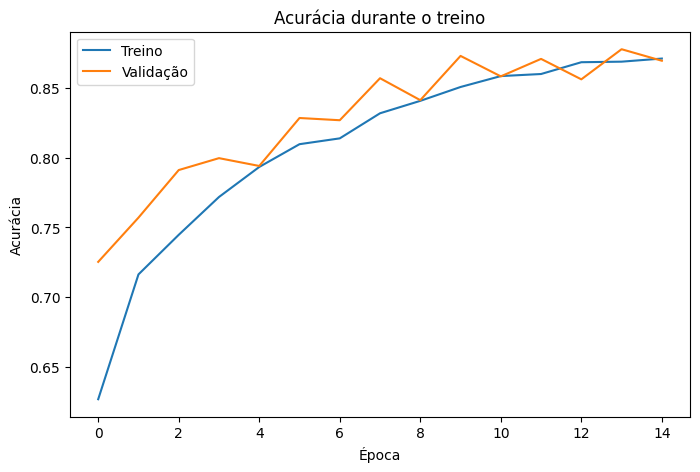

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 🔹 Caminhos das pastas
train_dir = "data/train"
val_dir = "data/val"
test_dir = "data/test"

# 1️⃣ Geradores de imagem (com aumento de dados)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# 2️⃣ Construção da CNN
model = models.Sequential([
    # Bloco 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    # Bloco 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Bloco 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Classificador final
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# 3️⃣ Compilação do modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4️⃣ Treinamento com Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop]
)

# 5️⃣ Avaliação final
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Acurácia no conjunto de teste: {test_acc:.3f}")

# 6️⃣ Gráfico de treino
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia durante o treino')
plt.show()


In [5]:
base = tf.keras.applications.MobileNetV2(
    weights='imagenet', include_top=False, input_shape=(224,224,3))
base.trainable = False

model.save('cats_vs_dogs_cnn.keras')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = (model.predict(test_generator) > 0.5).astype("int32")
print(classification_report(test_generator.classes, y_pred, target_names=['Cat', 'Dog']))


118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
              precision    recall  f1-score   support

         Cat       0.91      0.83      0.87      1875
         Dog       0.84      0.92      0.88      1875

    accuracy                           0.88      3750
   macro avg       0.88      0.88      0.87      3750
weighted avg       0.88      0.88      0.87      3750

